# Energy Usage Prediction

In this notebook, we look at the [2010 energy usage data](https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp) provided by the City of Chicago. Our goal is to predict the energy usage using [**linear regression**](https://en.wikipedia.org/wiki/Linear_regression). 

First, we will clean up the data so it's in a usable form. 

Then, we will visualize various columns and the relationships between them to get a better understanding of the data. 

Then, we will make a decision on whether linear regression is an appropriate model for our goal. 

Finally, assuming linear regression will work, we will use it to predict energy usage. 

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt, ticker as ticker
from IPython.display import display 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline 

In [63]:
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]
sns.set_palette(sns.color_palette(colors))

In [186]:
df = pd.read_csv('Energy_Usage_2010.csv')

df.shape

(67051, 73)

In [187]:
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

COMMUNITY AREA NAME                     object
CENSUS BLOCK                           float64
BUILDING TYPE                           object
BUILDING_SUBTYPE                        object
KWH JANUARY 2010                       float64
KWH FEBRUARY 2010                      float64
KWH MARCH 2010                         float64
KWH APRIL 2010                         float64
KWH MAY 2010                           float64
KWH JUNE 2010                          float64
KWH JULY 2010                          float64
KWH AUGUST 2010                        float64
KWH SEPTEMBER 2010                     float64
KWH OCTOBER 2010                       float64
KWH NOVEMBER 2010                      float64
KWH DECEMBER 2010                      float64
TOTAL KWH                              float64
ELECTRICITY ACCOUNTS                    object
ZERO KWH ACCOUNTS                        int64
THERM JANUARY 2010                     float64
THERM FEBRUARY 2010                    float64
THERM MARCH 2

Let's replace spaces with underscores in column names so we can reference them easily later on. Let's also lowercase them so we're not staring at a wall of text. =)

In [188]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['community_area_name', 'census_block', 'building_type',
       'building_subtype', 'kwh_january_2010', 'kwh_february_2010',
       'kwh_march_2010', 'kwh_april_2010', 'kwh_may_2010', 'kwh_june_2010',
       'kwh_july_2010', 'kwh_august_2010', 'kwh_september_2010',
       'kwh_october_2010', 'kwh_november_2010', 'kwh_december_2010',
       'total_kwh', 'electricity_accounts', 'zero_kwh_accounts',
       'therm_january_2010', 'therm_february_2010', 'therm_march_2010',
       'term_april_2010', 'therm_may_2010', 'therm_june_2010',
       'therm_july_2010', 'therm_august_2010', 'therm_september_2010',
       'therm_october_2010', 'therm_november_2010', 'therm_december_2010',
       'total_therms', 'gas_accounts', 'kwh_total_sqft', 'therms_total_sqft',
       'kwh_mean_2010', 'kwh_standard_deviation_2010', 'kwh_minimum_2010',
       'kwh_1st_quartile_2010', 'kwh_2nd_quartile_2010',
       'kwh_3rd_quartile_2010', 'kwh_maximum_2010', 'kwh_sqft_mean_2010',
       'kwh_sqft_standard_dev

In [189]:
df.head()

,community_area_name,census_block,building_type,building_subtype,kwh_january_2010,kwh_february_2010,kwh_march_2010,kwh_april_2010,kwh_may_2010,kwh_june_2010,...,total_population,total_units,average_stories,average_building_age,average_housesize,occupied_units,occupied_units_percentage,renter-occupied_housing_units,renter-occupied_housing_percentage,occupied_housing_units
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


Looks like there are a lot of null values. Let's check out % fill for each column

In [190]:
with pd.option_context('display.max_rows', None):
    display((df.notna().sum()/len(df) * 100).sort_values(ascending=False))

community_area_name                    100.000000
average_building_age                   100.000000
zero_kwh_accounts                      100.000000
average_stories                        100.000000
total_population                        99.979120
total_units                             99.979120
occupied_housing_units                  99.979120
average_housesize                       99.979120
renter-occupied_housing_units           99.979120
occupied_units                          99.979120
building_type                           99.885162
census_block                            99.885162
building_subtype                        99.885162
kwh_1st_quartile_2010                   98.700989
kwh_3rd_quartile_2010                   98.700989
kwh_maximum_2010                        98.700989
kwh_minimum_2010                        98.700989
total_kwh                               98.700989
electricity_accounts                    98.700989
kwh_mean_2010                           98.700989


The variables we are interested in predicting are the **total_kwh** (electricity) and **total_therms** (gas). Good news is that most of the rows contains values for them. In general, there are few missing values in the dataset (other than STD, most of the columns are over 90% filled). Let's get rid of the rows with missing y-variables.

Some definitions: 

- **kWH** = KiloWatt Hour = the amount of energy consumed by a 1000-watt appliance in one hour. A 100-watt appliance would take 10 hours to consume the same amount of energy; a 10,000-watt appliance would take 6 minutes. Here's an [article](https://www.ovoenergy.com/guides/energy-guides/what-is-a-kwh-kw-and-kwh-explained.html) by OVO Energy that goes into more depth. 

- **Therms** = if you guessed that this is the unit of measurement for your gas usage, you're right! Here's an [article](https://welcome.arcadia.com/energy-101/energy-bills/what-is-a-therm) by Arcadia that goes into more depth. 

In [191]:
df = df[df.total_kwh.notna()]
df = df[df.total_therms.notna()]

df.shape

(64884, 73)

In [192]:
with pd.option_context('display.max_rows', None):
    display((df.notna().sum()/len(df) * 100).sort_values(ascending=False))

community_area_name                    100.000000
kwh_3rd_quartile_2010                  100.000000
kwh_2nd_quartile_2010                  100.000000
kwh_1st_quartile_2010                  100.000000
kwh_minimum_2010                       100.000000
kwh_mean_2010                          100.000000
gas_accounts                           100.000000
total_therms                           100.000000
zero_kwh_accounts                      100.000000
therm_mean_2010                        100.000000
electricity_accounts                   100.000000
therm_minimum_2010                     100.000000
therm_1st_quartile_2010                100.000000
therm_2nd_quartile_2010                100.000000
therm_3rd_quartile_2010                100.000000
therm_maximum_2010                     100.000000
total_kwh                              100.000000
kwh_december_2010                      100.000000
kwh_november_2010                      100.000000
kwh_october_2010                       100.000000


We got rid of around 3000 rows (around 5%). 

If we look at the remaining rows, most of the features we care about are fully populated, so let's continue.

## A look at total_kwh and total_therms

Given that these are the variables we want to predict, let's look at what they look like. 

<AxesSubplot:xlabel='total_therms', ylabel='Count'>

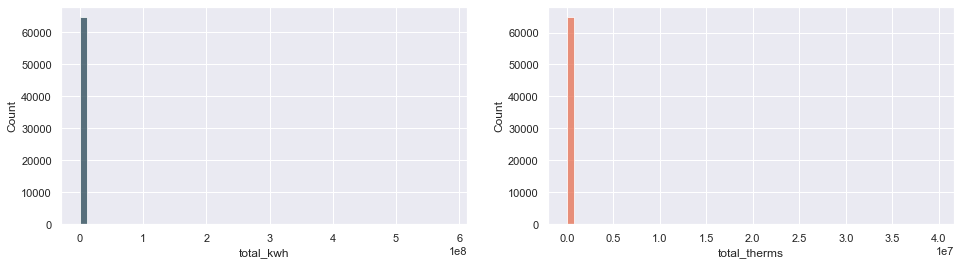

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.histplot(ax=ax[0], data=df.total_kwh, stat='count', bins=50)
sns.histplot(ax=ax[1], data=df.total_therms, stat='count', bins=50, color='#e76f51')

Well, that's not very useful ... 

(134.0, 583174732.0, 229366.73412551632, 63119.0, 4225022.357564095)

(25.0, 39667571.0, 19938.117070464214, 10440.5, 206488.9522040319)

<AxesSubplot:xlabel='total_therms'>

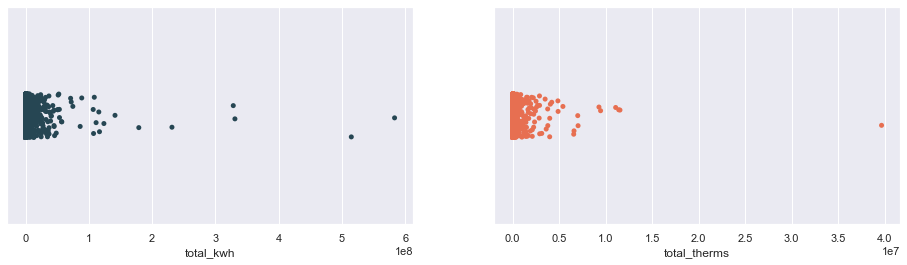

In [194]:
display((
    df.total_kwh.min(), df.total_kwh.max(), 
    df.total_kwh.mean(), df.total_kwh.median(), 
    df.total_kwh.std()))

display((
    df.total_therms.min(), df.total_therms.max(), 
    df.total_therms.mean(), df.total_therms.median(), 
    df.total_therms.std()))

fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.stripplot(ax=ax[0], x=df.total_kwh, size=5)
sns.stripplot(ax=ax[1], x=df.total_therms, size=5, color='#e76f51')

Ok, clearly, we have outliers. The mean is around 250,000 and the median is only ~60,000! 

<AxesSubplot:xlabel='total_kwh'>

(0, 0, 76, 3382, 43897, 63930, 64719, 64884)

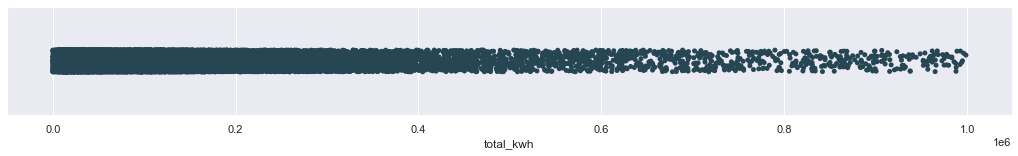

In [195]:
fig, ax = plt.subplots(figsize=(18,2))

display(sns.stripplot(ax=ax, x=df.total_kwh[df.total_kwh < 1000000], size=5))

(
    len(df.total_kwh[df.total_kwh < 10]),
    len(df.total_kwh[df.total_kwh < 100]),
    len(df.total_kwh[df.total_kwh < 1000]),
    len(df.total_kwh[df.total_kwh < 10000]),
    len(df.total_kwh[df.total_kwh < 100000]),
    len(df.total_kwh[df.total_kwh < 1000000]),
    len(df.total_kwh[df.total_kwh < 10000000]),
    len(df.total_kwh))

Most of the consumption (98%) is under 100,000 kWH, but there are a few outliers in the millions. Let's try to `log` transform the y-variable so we can see all the data. 

<AxesSubplot:xlabel='log10_total_therms', ylabel='Count'>

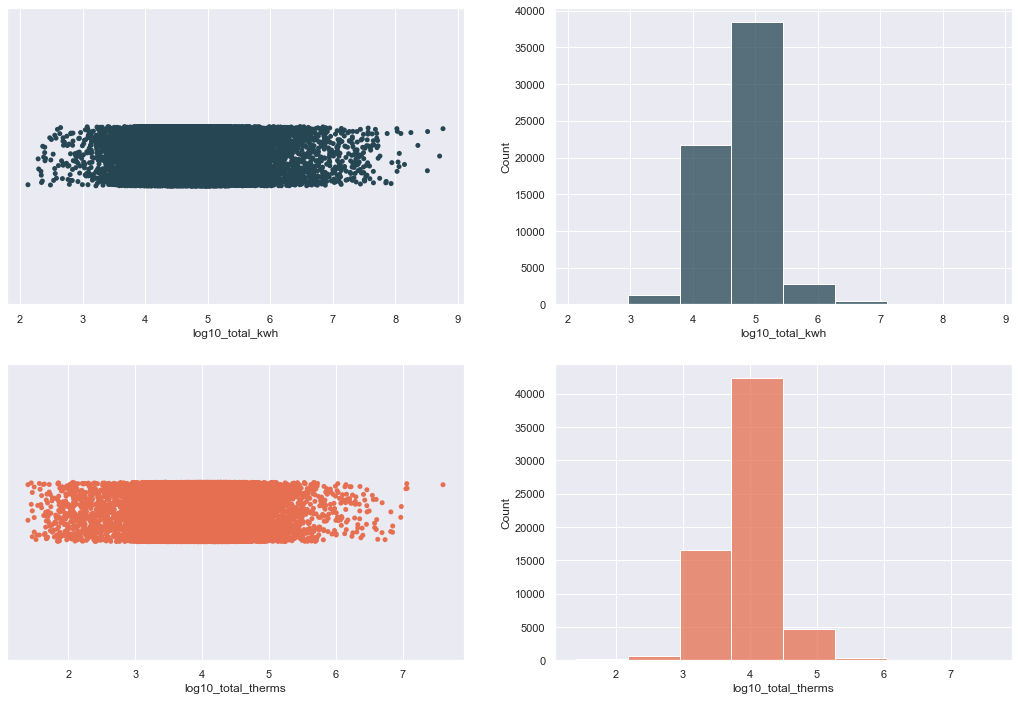

In [196]:
df['log10_total_kwh'] = np.log10(df.total_kwh)
df['log10_total_therms'] = np.log10(df.total_therms)

fig, ax = plt.subplots(2, 2, figsize=(18,12))

sns.stripplot(ax=ax[0,0], x=df.log10_total_kwh, size=5)
sns.histplot(ax=ax[0,1], x=df.log10_total_kwh, stat='count', bins=8)

sns.stripplot(ax=ax[1,0], x=df.log10_total_therms, size=5, color='#e76f51')
sns.histplot(ax=ax[1,1], x=df.log10_total_therms, stat='count', bins=8, color='#e76f51')

So, the majority of the usage is in the tens of thousands - hundreds of thousands range, with outliers on both sides. Unsurprisingly, there's not a major difference in consumption of energy vs. gas.

## A look at relationships

Let's now turn our attention to the various features and see how they impact energy and gas usage.

In [197]:
df[['log10_total_kwh', 'community_area_name', 'average_stories', 'average_building_age', 
    'average_housesize', 'total_units', 'occupied_units', 'total_population', 
    'renter-occupied_housing_units', 'occupied_housing_units', 'building_subtype', 
    'building_type']].head().T

,97,103,104,120,131
log10_total_kwh,4.61974,4.19493,3.72892,4.83553,4.51093
community_area_name,Lakeview,Lincoln Park,Lincoln Park,Logan Square,Near North Side
average_stories,3,4,4,1,3
average_building_age,12,12,0,0,116
average_housesize,2,2.77,1.79,2.59,2
total_units,45,22,88,39,18
occupied_units,37,22,62,39,18
total_population,74,61,111,101,36
renter-occupied_housing_units,3,11,39,11,12
occupied_housing_units,37,22,62,39,18


### Community Area Name

77

[Text(0.5, 0, 'log10_total_kwh (color), log10_total_therms (hatches)')]

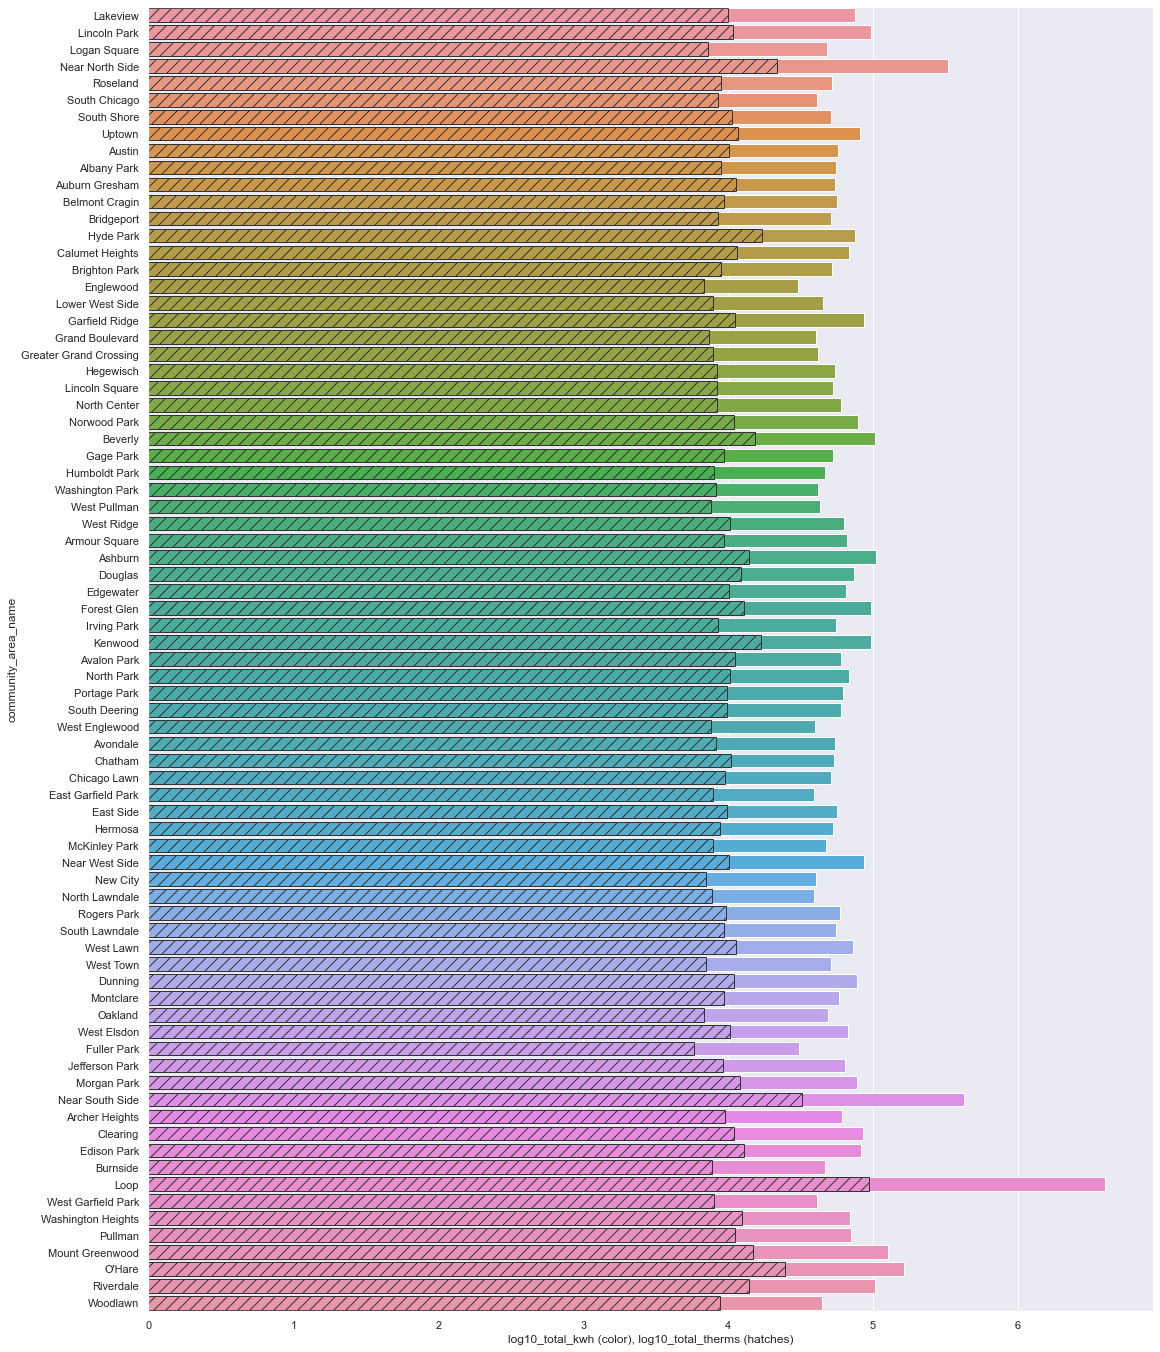

In [198]:
display(df['community_area_name'].nunique())

fig, ax = plt.subplots(figsize=(18,24))

sns.barplot(ax=ax, x='log10_total_kwh', y='community_area_name', data=df, ci=None)
sns.barplot(ax=ax, x='log10_total_therms', y='community_area_name', data=df, ci=None, fill=False, hatch='//', edgecolor=['#333'])
ax.set(xlabel='log10_total_kwh (color), log10_total_therms (hatches)')

All communities are using more electricity than gas. There is a good amount of variation in usage between communities (remember that we are looking at log10 values, which means that a change of 1 = a change of 10 in actual usage). This probably has something to do with the size of each community, so let's take a look at that next. 

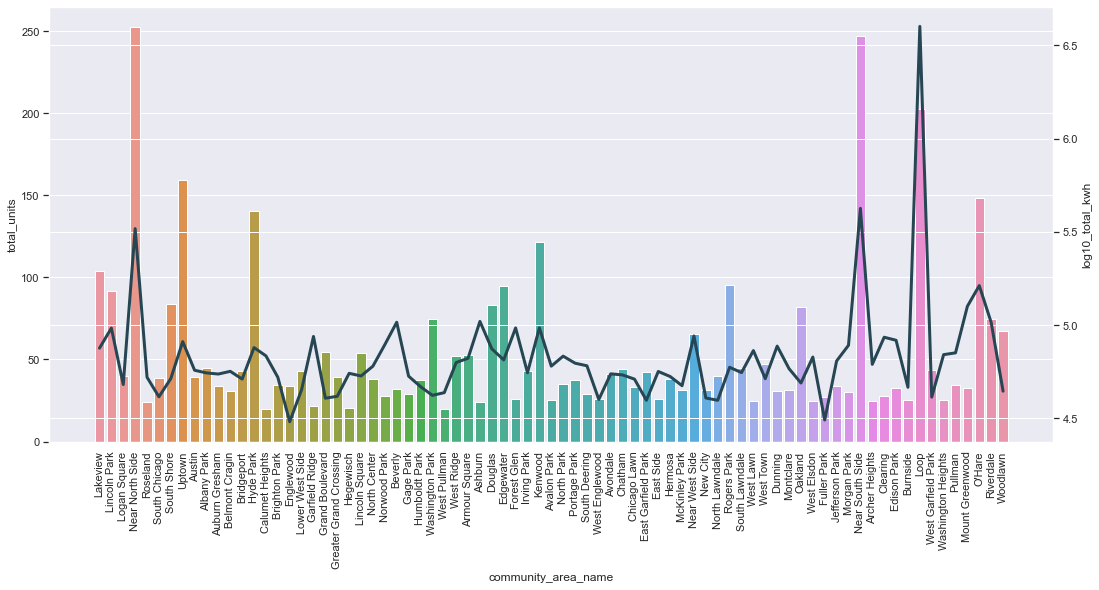

In [199]:
comm_agg = df['community_area_name'].value_counts() \
    .rename_axis('community_area_name') \
    .reset_index(name='count')

fig, ax = plt.subplots(figsize=(18,8))

# sns.barplot(data=comm_agg, ax=ax, x='community_area_name', y='count')
sns.barplot(data=df, ax=ax, x='community_area_name', y='total_units', ci=None)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
ax2 = ax.twinx()
sns.lineplot(data=df, ax=ax2, x='community_area_name', y='log10_total_kwh', ci=None, linewidth=3)

plt.show()

Ok, if you squint, there is a rough relationship between usage and no. of units in a community area, but it's not strong. 

Let's look to see how the other features fare.

### Building info vs. usage

average_stories          384
average_building_age    6747
average_housesize        596
dtype: int64

<AxesSubplot:xlabel='building_type', ylabel='log10_total_kwh'>

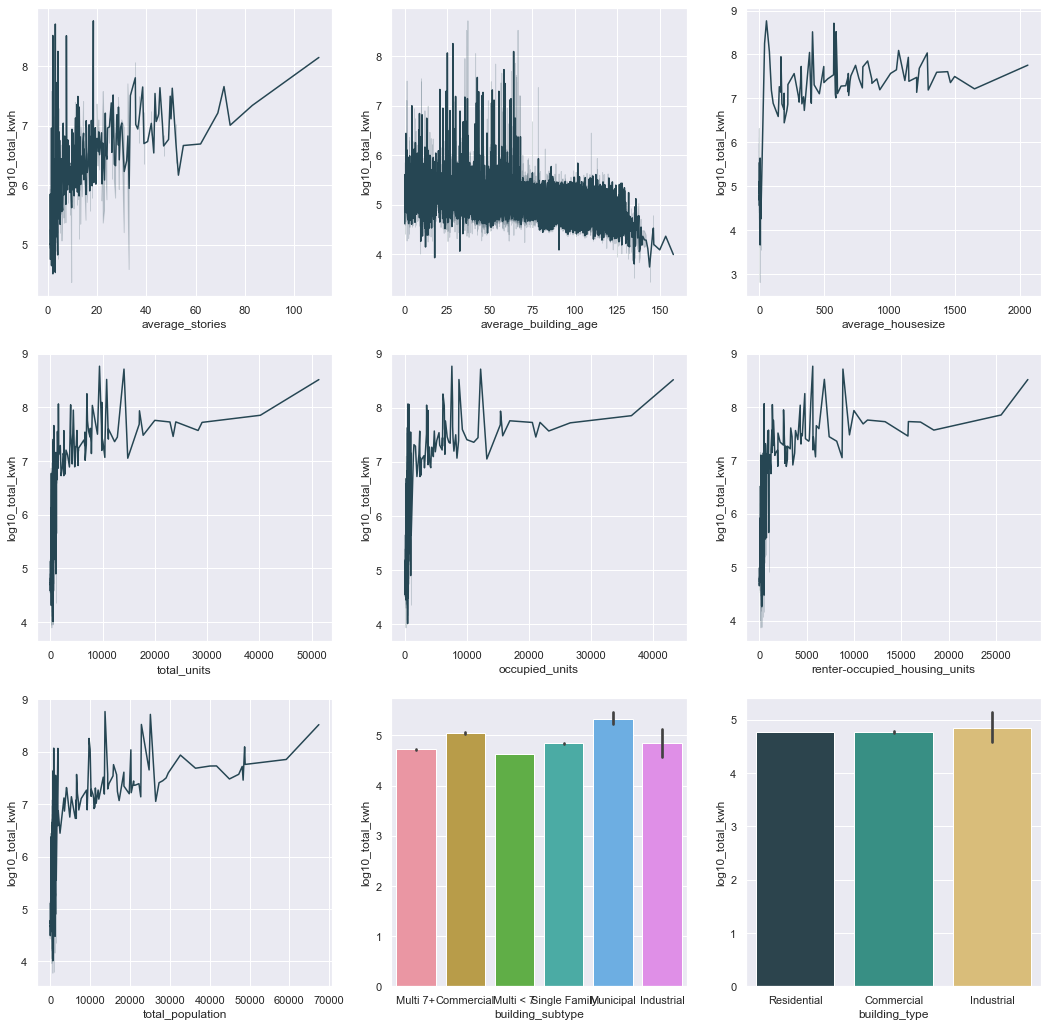

In [116]:
display(df[['average_stories', 'average_building_age', 'average_housesize']].nunique())

fig, ax = plt.subplots(3, 3, figsize=(18,18))

sns.lineplot(data=df, ax=ax[0,0], x='average_stories', y='log10_total_kwh')
sns.lineplot(data=df, ax=ax[0,1], x='average_building_age', y='log10_total_kwh')
sns.lineplot(data=df, ax=ax[0,2], x='average_housesize', y='log10_total_kwh')

sns.lineplot(data=df, ax=ax[1,0], x='total_units', y='log10_total_kwh')
sns.lineplot(data=df, ax=ax[1,1], x='occupied_units', y='log10_total_kwh')
sns.lineplot(data=df, ax=ax[1,2], x='renter-occupied_housing_units', y='log10_total_kwh')

sns.lineplot(data=df, ax=ax[2,0], x='total_population', y='log10_total_kwh')
sns.barplot(data=df, ax=ax[2,1], x='building_subtype', y='log10_total_kwh')
sns.barplot(data=df, ax=ax[2,2], x='building_type', y='log10_total_kwh')

Ok, so you can see a very rough linear relationship between `average_stories` and energy usage ... but a reverse trend for `average_building_age`, which I did not expect. You would have expected older buildings to be more inefficient and therefore consume more energy. Let's look at these buildings some more. 

In [200]:
def get_age_group(age):
    if not age:
        return -1
    elif age < 10:
        return 10
    elif age < 20:
        return 20
    elif age < 30:
        return 30
    elif age < 40:
        return 40
    elif age < 50:
        return 50
    elif age < 60:
        return 60
    elif age < 70:
        return 70
    elif age < 80:
        return 80
    elif age < 90:
        return 90
    elif age < 100:
        return 100
    elif age < 110:
        return 110
    elif age < 120:
        return 120
    elif age < 130:
        return 130
    elif age < 140:
        return 140
    elif age < 150:
        return 150
    else:
        return 151
    

df['building_age_group'] = df.apply(lambda row: get_age_group(row['average_building_age']), axis=1)  

<AxesSubplot:xlabel='building_type', ylabel='average_building_age'>

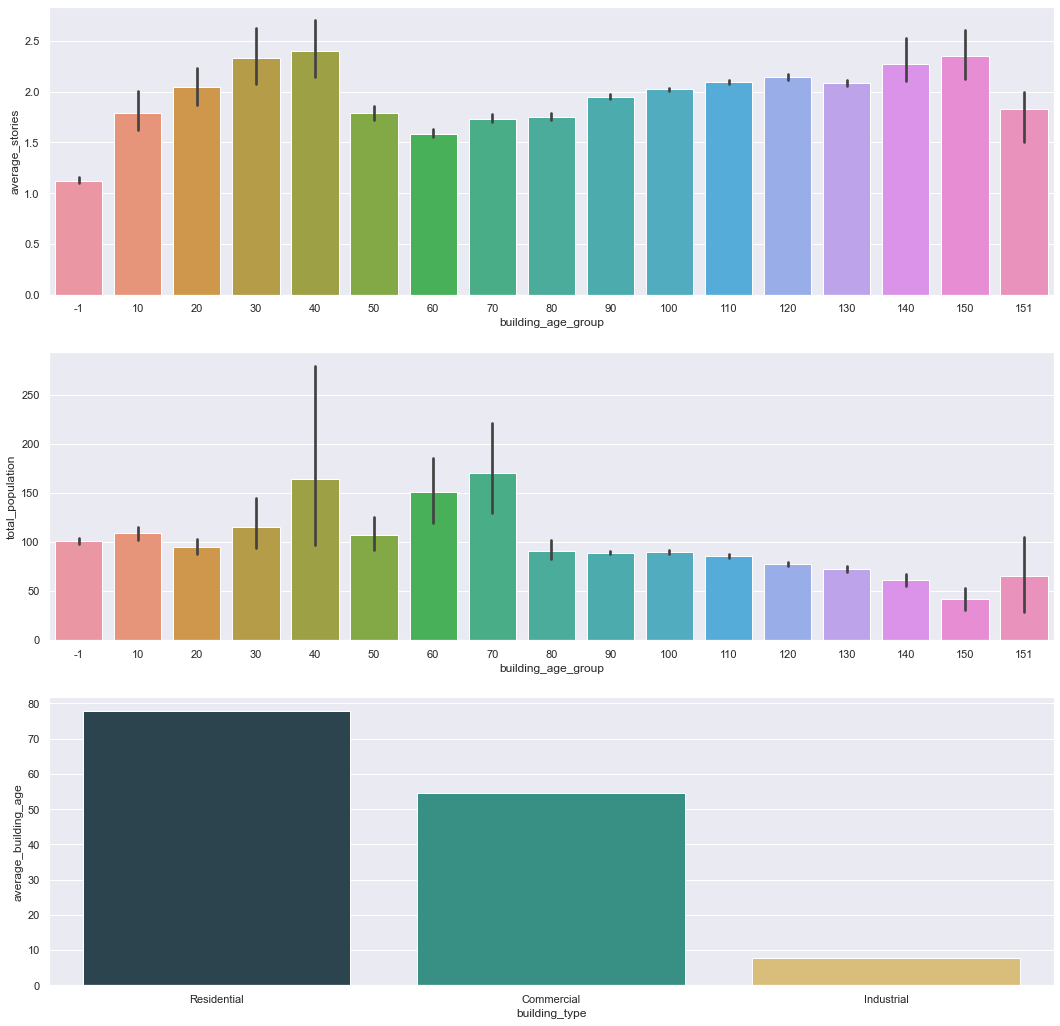

In [156]:
fig, ax = plt.subplots(3 , 1, figsize=(18,18))

sns.barplot(data=df, ax=ax[0], x='building_age_group', y='average_stories')
sns.barplot(data=df, ax=ax[1], x='building_age_group', y='total_population')
sns.barplot(data=df, ax=ax[2], x='building_type', y='average_building_age', ci=None)

The graphs don't suggest anything obvious. So, the question of why building age is sort of inversely correlated to usage remains a mystery.

### Correlation Matrix

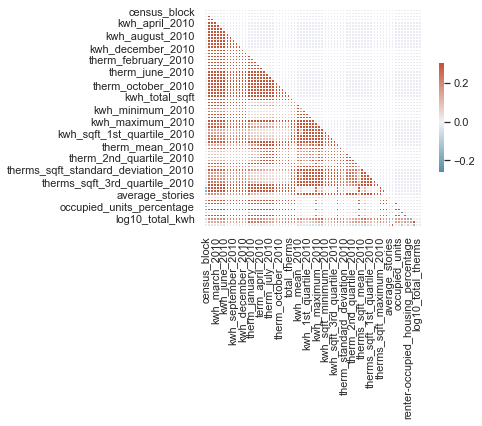

In [316]:
relevant_columns = ['log10_total_kwh', 'log10_total_therms', 
                    'community_area_name', 'average_stories', 'average_building_age', 
                    'average_housesize', 'total_units', 'occupied_units', 'total_population', 
                    'renter-occupied_housing_units', 'occupied_housing_units', 'building_subtype', 
                    'building_type']

corr = df[relevant_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5})

plt.show()

Looking at the first column, we can see that most features are correlated with energy usage (esp. `total_therms`, but that's not really relevant and we're going to remove it during our regression analysis). `average_building_age` is inversely correlated (`< 0`), which is what we saw in the analysis above. 

## Linear Regression

In [307]:
dfs = df.copy()

dfs['building_type'] = dfs['building_type'].fillna('Unknown')
dfs['building_subtype'] = dfs['building_subtype'].fillna('Unknown')

dfs = dfs.fillna(0)

def encode_category_column(df, column_name):
    for value in df[column_name].unique():
        sanitized_value = value.replace(' ', '_').lower()
        
        feature = f'is_{column_name}_{sanitized_value}'
        feature_value = (df[column_name] == value).astype(int)
        df[feature] = feature_value 
        
    return df

def convert_to_electricity_group(electricity_accounts):
    if electricity_accounts == 'Less than 4':
        return 1
    
    int_value = int(electricity_accounts)
    
    if int_value < 2:
        return 2
    elif int_value < 4:
        return 3
    elif int_value < 10:
        return 4
    elif int_value < 20:
        return 5
    elif int_value < 40:
        return 6 
    elif int_value < 100:
        return 7
    else:
        return 8

def encode_electricity(df):
    df['electricity_account_group'] = df.apply(
        lambda row: convert_to_electricity_group(row['electricity_accounts']), axis=1)
    
    return df 

dfs = encode_category_column(dfs, 'building_type')
dfs = encode_category_column(dfs, 'building_subtype')
dfs = encode_category_column(dfs, 'community_area_name')
dfs = encode_electricity(dfs)

dfs.head().T

,97,103,104,120,131
community_area_name,Lakeview,Lincoln Park,Lincoln Park,Logan Square,Near North Side
census_block,1.70311e+14,1.70311e+14,1.70311e+14,1.70318e+14,1.70311e+14
building_type,Residential,Residential,Commercial,Commercial,Residential
building_subtype,Multi 7+,Multi 7+,Multi 7+,Commercial,Multi < 7
kwh_january_2010,1526,242,0,6171,1959
...,...,...,...,...,...
is_community_area_name_mount_greenwood,0,0,0,0,0
is_community_area_name_o'hare,0,0,0,0,0
is_community_area_name_riverdale,0,0,0,0,0
is_community_area_name_woodlawn,0,0,0,0,0


'MSE: 0.23402196980976864'

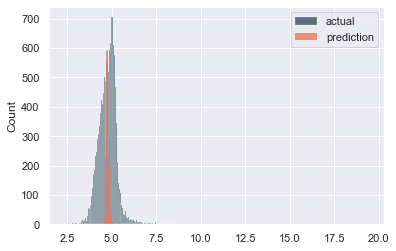

In [293]:
base_columns = ['log10_total_kwh', 'average_stories', 'average_building_age', 
                 'average_housesize', 'total_units', 'total_population', 
                 'occupied_units', 'renter-occupied_housing_units']

def train(df):
    train_X, test_X = train_test_split(df, test_size=0.2)

    train_y = train_X.log10_total_kwh.values 
    test_y = test_X.log10_total_kwh.values

    del train_X['log10_total_kwh']
    del test_X['log10_total_kwh']

    reg = LinearRegression()
    reg.fit(train_X, train_y)

    pred_y = reg.predict(test_X)

    mse = mean_squared_error(test_y, pred_y)
    
    return (mse, pred_y, test_y)

def run_model(df, actual_y):
    mse, pred_y, test_y = train(df)

    display(f'MSE: {mse}')

    sns.histplot(actual_y, label='actual')
    sns.histplot(pred_y, label='prediction', color='#e76f51')

    plt.legend()
    plt.show()

lindf = dfs[base_columns]
run_model(lindf, test_y)

Based on just the numeric columns, our model is able to correctly predict somewhat well, but not too great. Let's add the category columns that we encoded earlier (building type/subtype, community name) and see how they impact the model.

'MSE: 0.1885014897017262'

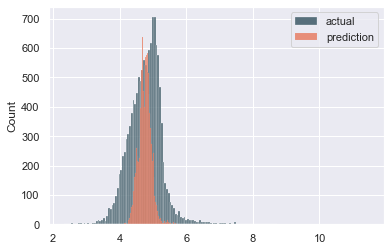

In [309]:
encoded_columns = [col for col in dfs if col.startswith('is_')]

lindf = dfs[base_columns + encoded_columns]
run_model(lindf, test_y)

Ok, much better! 

Let's add `electricity_account_group` to see whether that's of any use. 

'MSE: 0.09811971041175149'

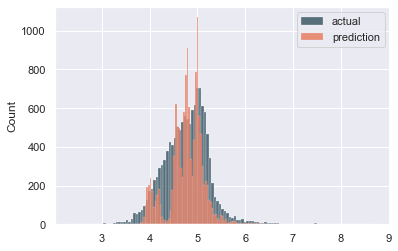

In [308]:
lindf = dfs[base_columns + encoded_columns + ['electricity_account_group']]
run_model(lindf, test_y)

Better! 

Unfortunately, we've basically run out of interesting columns, so let's stop here (for linear regression). For comparison, below are the predictions when we include `total_therms` in the list of features. 

'MSE: 0.08944681450116068'

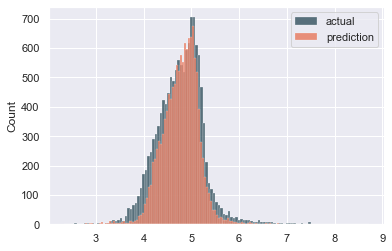

In [315]:
lindf = dfs[['log10_total_kwh', 'log10_total_therms']]
run_model(lindf, test_y)

As expected, nearly perfect prediction (though the model would be of little use in the real world). =)